In [1]:
from pimports import *
pd.set_option('display.max_columns', None)

In [2]:
!tree data

data
├── acp
│   ├── test_data.csv
│   ├── test_data.csv:Zone.Identifier
│   ├── train_data.csv
│   └── train_data.csv:Zone.Identifier
├── amp
│   ├── all_data.csv
│   └── all_data.csv:Zone.Identifier
└── dna_binding
    ├── test.csv
    ├── test.csv:Zone.Identifier
    ├── train.csv
    └── train.csv:Zone.Identifier

3 directories, 10 files


In [3]:
!head data/acp/test_data.csv

sequences,label
FLPLLLSALPSFLCLVFKKC,0
DKLIGSCVWLAVNYTSNCNAECKRRGYKGGHCGSFLNVNCWCET,0
AVKDTYSCFIMRGKCRHECHDFEKPIGFCTKLNANCYM,0
GLPTCGETCFGGTCNTPGCTCDPWPVCTHN,1
ENCGRQAG,0
GVLDAFRKIATVVKNVV,0
VAKKFAKKFKKFAKKFAKFAFAF,1
GIGKFLHSAKKWGKAFVGQIMNC,1
ALWKNMLKGIGKLAGKAALGAVKKLVGAES,1


These are real CSVs, not fasta, unlike most protein data.

In [4]:
acp_df = pd.read_csv('data/acp/train_data.csv')
acp_df

,sequences,label
0,RRWWRRWRRW,0
1,GWKSVFRKAKKVGKTVGGLALDHYLG,0
2,ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ,1
3,GLFDVIKKVAAVIGGL,1
4,VAKLLAKLAKKVL,1
...,...,...
1373,LLKLLKWLLKLLK,0
1374,GFKDWIKGAAKKLIKTVAANIANQ,0
1375,ESEFDRQEYEECKRQCMQLETSGQMRRCVSQCDKRFEEDIDWSKYDNQE,0
1376,FISAIASFLGKFL,1


In [5]:
acp_df['label'].value_counts()

0    689
1    689
Name: label, dtype: int64

In [6]:
# Starting char
acp_df['sequences'].str[0].value_counts()

G    342
F    246
K    142
A    111
R     86
S     53
I     52
L     51
D     46
V     44
Q     29
E     28
C     28
P     22
T     21
M     20
N     17
Y     14
H     14
W     12
Name: sequences, dtype: int64

In [7]:
acp_df['unique_characters'] = acp_df['sequences'].apply(lambda x: len(np.unique([*x])))
acp_df['unique_characters']

0        2
1       13
2       12
3        8
4        4
        ..
1373     3
1374    12
1375    17
1376     7
1377     6
Name: unique_characters, Length: 1378, dtype: int64

<AxesSubplot:xlabel='unique_characters', ylabel='Density'>

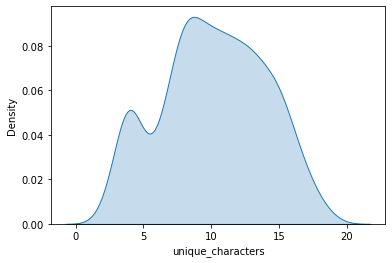

In [8]:
sns.kdeplot(acp_df['unique_characters'], shade=True)

<AxesSubplot:xlabel='sequence_len', ylabel='Density'>

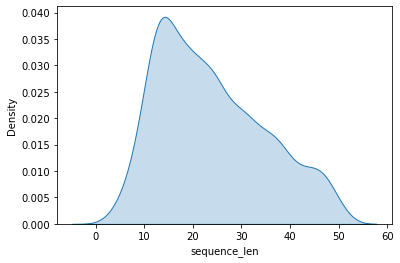

In [9]:
acp_df['sequence_len'] = acp_df['sequences'].str.len()
sns.kdeplot(acp_df['sequence_len'], shade=True)

In [55]:
all_chars = sorted(set(acp_df[['sequences']].applymap(list).sequences.apply(pd.Series).stack().unique()))
len(all_chars)

20

In [11]:
for char in sorted(all_chars):
    acp_df[f'char_count_{char}'] = acp_df['sequences'].str.count(char)

In [12]:
acp_df.describe()

,label,unique_characters,sequence_len,char_count_A,char_count_C,char_count_D,char_count_E,char_count_F,char_count_G,char_count_H,char_count_I,char_count_K,char_count_L,char_count_M,char_count_N,char_count_P,char_count_Q,char_count_R,char_count_S,char_count_T,char_count_V,char_count_W,char_count_Y
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,0.500000,10.148041,23.826560,2.050073,1.633527,0.530479,0.550798,1.113933,2.288099,0.468795,1.472424,3.005080,2.465167,0.277939,0.812046,0.896952,0.500726,1.313498,1.232946,0.949927,1.261974,0.499274,0.502903
std,0.500182,3.849926,11.061246,2.001369,2.457471,1.030127,1.033549,1.104264,2.227873,0.895060,1.483252,2.366396,1.904554,0.569466,1.090768,1.508958,1.048739,1.944130,1.464225,1.353214,1.373160,0.810470,0.932153
min,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,10.000000,22.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,13.000000,31.000000,3.000000,2.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,4.000000,4.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,1.000000,19.000000,50.000000,11.000000,10.000000,17.000000,9.000000,8.000000,16.000000,9.000000,9.000000,12.000000,12.000000,5.000000,7.000000,20.000000,12.000000,11.000000,9.000000,8.000000,8.000000,8.000000,5.000000


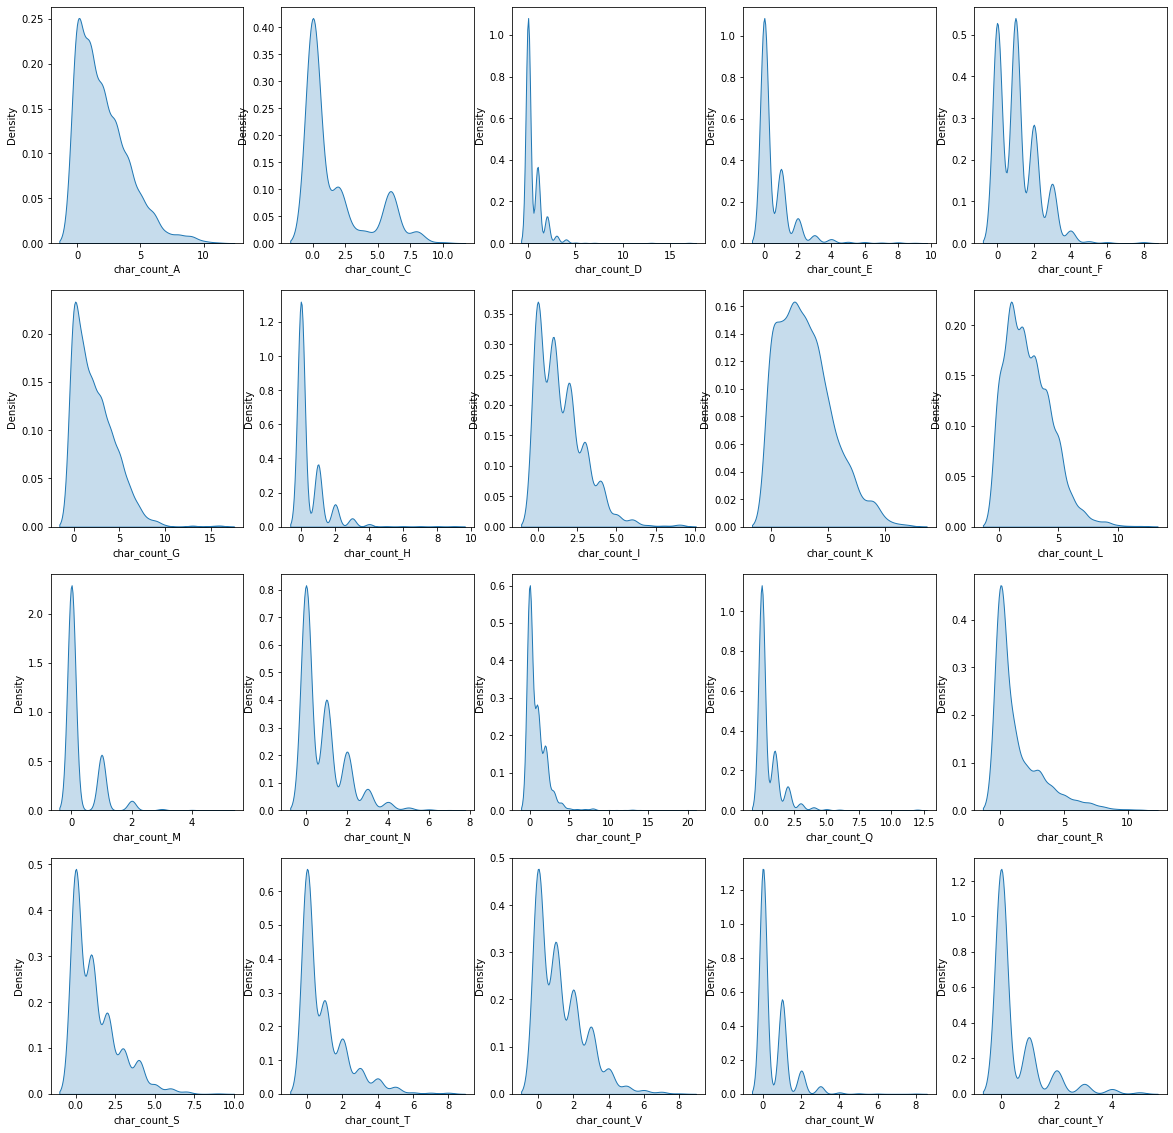

In [62]:
fig, axs = plt.subplots(4,5, figsize=(20, 20))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(all_chars):
    sns.kdeplot(acp_df[f'char_count_{char}'], shade=True, ax=axs[i])

<AxesSubplot:xlabel='sequence_len'>

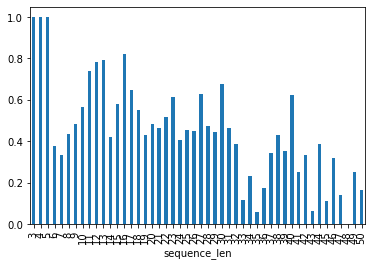

In [39]:
# Percent of ACP by sequence length
acp_df.groupby('sequence_len')['label'].mean().plot.bar()

Looks like sequence length probably has nothing to do with classification, except maybe a bias towards less than 33 chars.

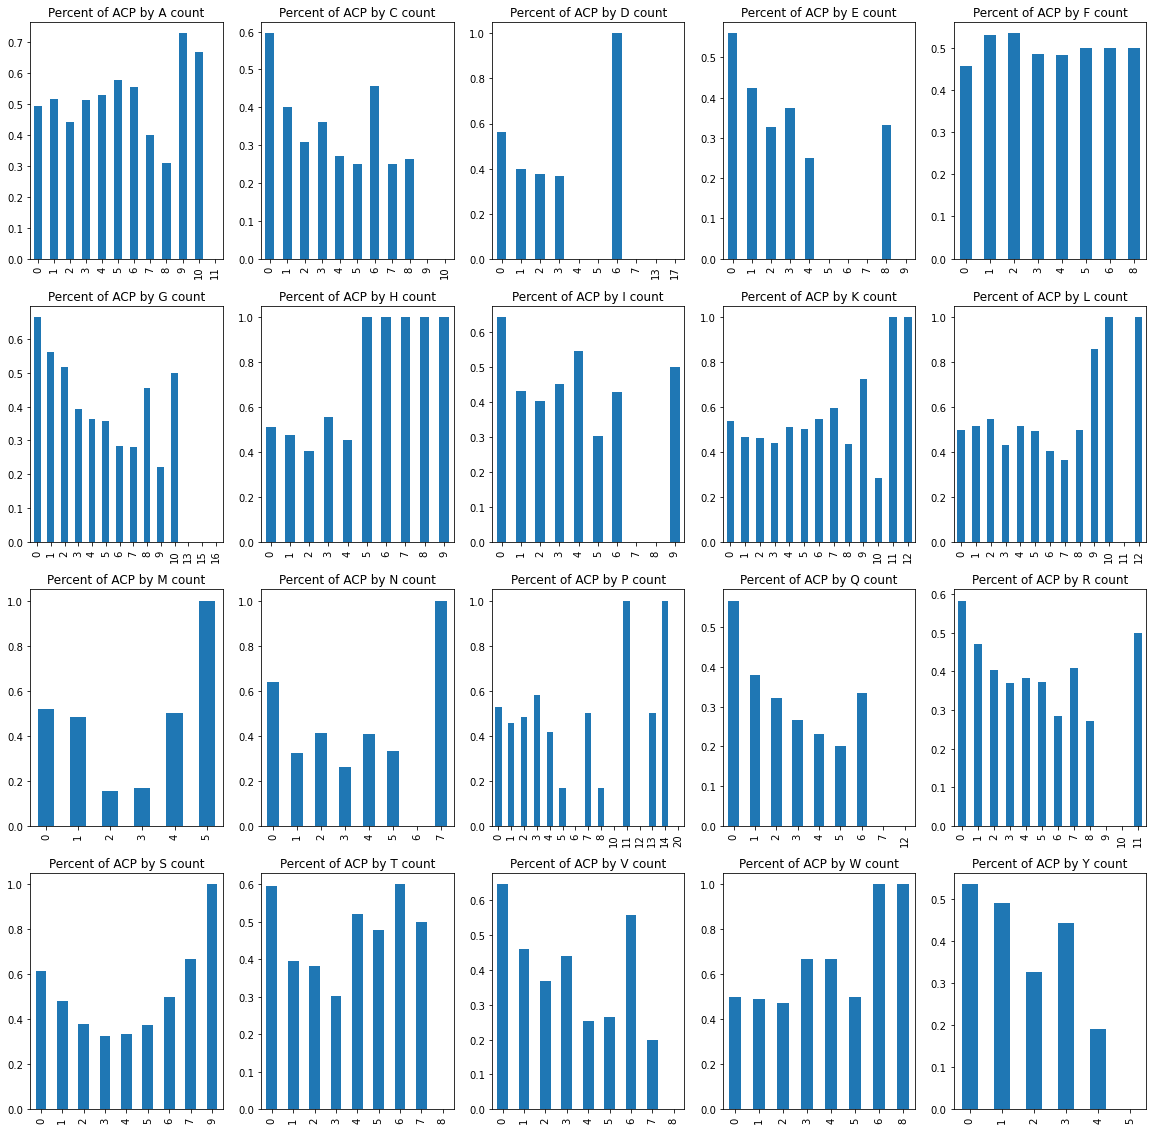

In [54]:
# Percent of ACP by sequence length
fig, axs = plt.subplots(4,5, figsize=(20, 20))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(sorted(all_chars)):
    acp_df.groupby(f'char_count_{char}')['label'].mean().plot.bar(ax=axs[i], title=f'Percent of ACP by {char} count', xlabel='')

/tmp/ipykernel_12449/2546097619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(acp_df.corr(), annot=True)


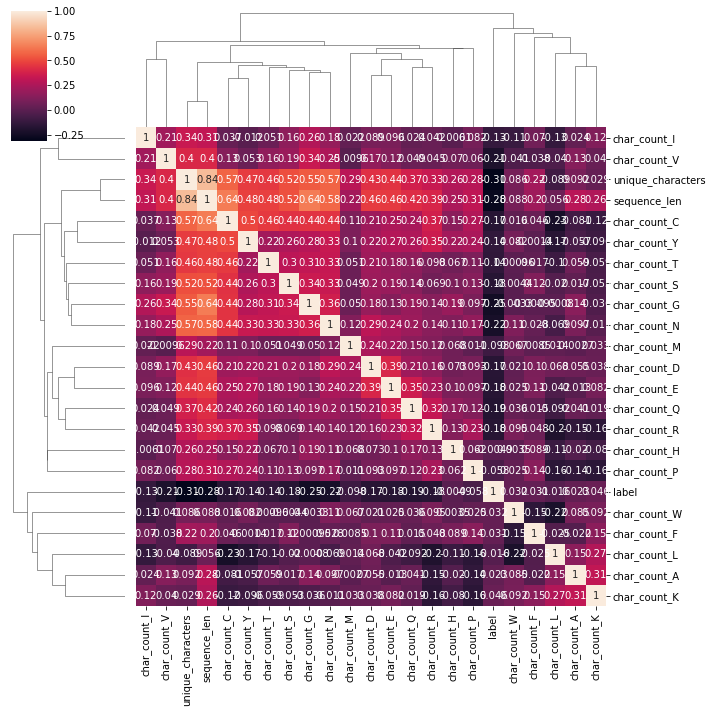

In [63]:
sns.clustermap(acp_df.corr(), annot=True)

Lets compare with the other csv's

In [67]:
amp_df = pd.read_csv('data/amp/all_data.csv').rename(columns={'SequenceID': 'sequences'})
amp_df

,PDBs_code,sequences,label
0,AP02484,GMASKAGSVLGKITKIALGAL,1
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1
2,AP01427,GAIKDALKGAAKTVAVELLKKAQCKLEKTC,1
3,AP02983,FFGRLKAVFRGARQGWKEHRY,1
4,AP01815,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMG,1
...,...,...,...
4037,UniRef50_C5DJ44,SSGNVNEVPKQNAKHPMDSCQNLEQSAGTTSAEKEAIRALESQSSG...,0
4038,UniRef50_Q9XUP3,ESCNFAVFWKLVKGAYKPTTNPNEPFKVPGEVPKMIKPMVGFEDAV...,0
4039,UniRef50_Q9Y573,VAALNDCIYSVGGWNETQDALHTVEKYSFEEEKWVEVASMKVPRAG...,0
4040,UniRef50_Q54H44,PHTHTQKEVITSSVD,0


In [68]:
amp_df['label'].value_counts()

1    2021
0    2021
Name: label, dtype: int64

<AxesSubplot:xlabel='unique_characters', ylabel='Density'>

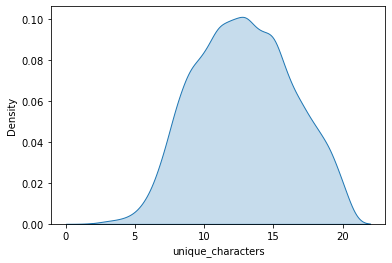

In [69]:
amp_df['unique_characters'] = amp_df['sequences'].apply(lambda x: len(np.unique([*x])))
sns.kdeplot(amp_df['unique_characters'], shade=True)

<AxesSubplot:xlabel='sequence_len', ylabel='Density'>

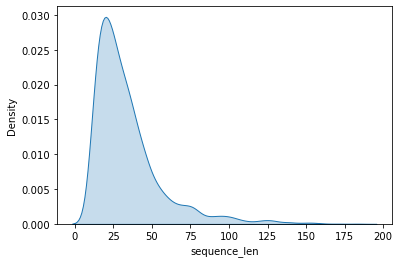

In [70]:
amp_df['sequence_len'] = amp_df['sequences'].str.len()
sns.kdeplot(amp_df['sequence_len'], shade=True)

In [71]:
all_amp_chars = sorted(set(amp_df[['sequences']].applymap(list).sequences.apply(pd.Series).stack().unique()))
len(all_amp_chars)

21

In [73]:
for char in all_amp_chars:
    amp_df[f'char_count_{char}'] = amp_df['sequences'].str.count(char)
amp_df.describe()

,label,unique_characters,sequence_len,char_count_A,char_count_C,char_count_D,char_count_E,char_count_F,char_count_G,char_count_H,char_count_I,char_count_K,char_count_L,char_count_M,char_count_N,char_count_P,char_count_Q,char_count_R,char_count_S,char_count_T,char_count_V,char_count_W,char_count_X,char_count_Y
count,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,0.500000,12.849085,34.002474,2.596982,1.298367,1.439881,1.701385,1.343147,2.905492,0.794409,1.976497,2.756309,3.038347,0.564819,1.397328,1.639782,1.169471,2.007422,2.267689,1.621227,2.085849,0.484661,0.000990,0.912420
std,0.500062,3.473303,22.327532,2.800046,2.222256,1.820984,2.178758,1.430486,3.690712,1.235072,1.878832,2.723820,2.505972,0.896737,1.754119,2.449971,1.626685,2.510447,2.481825,1.844694,2.088207,0.866996,0.049736,1.363341
min,0.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.500000,13.000000,28.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,15.000000,41.000000,4.000000,2.000000,2.000000,3.000000,2.000000,4.000000,1.000000,3.000000,4.000000,4.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,1.000000,0.000000,1.000000
max,1.000000,20.000000,183.000000,24.000000,16.000000,16.000000,18.000000,15.000000,97.000000,12.000000,22.000000,30.000000,23.000000,7.000000,32.000000,42.000000,16.000000,28.000000,37.000000,16.000000,19.000000,8.000000,3.000000,14.000000


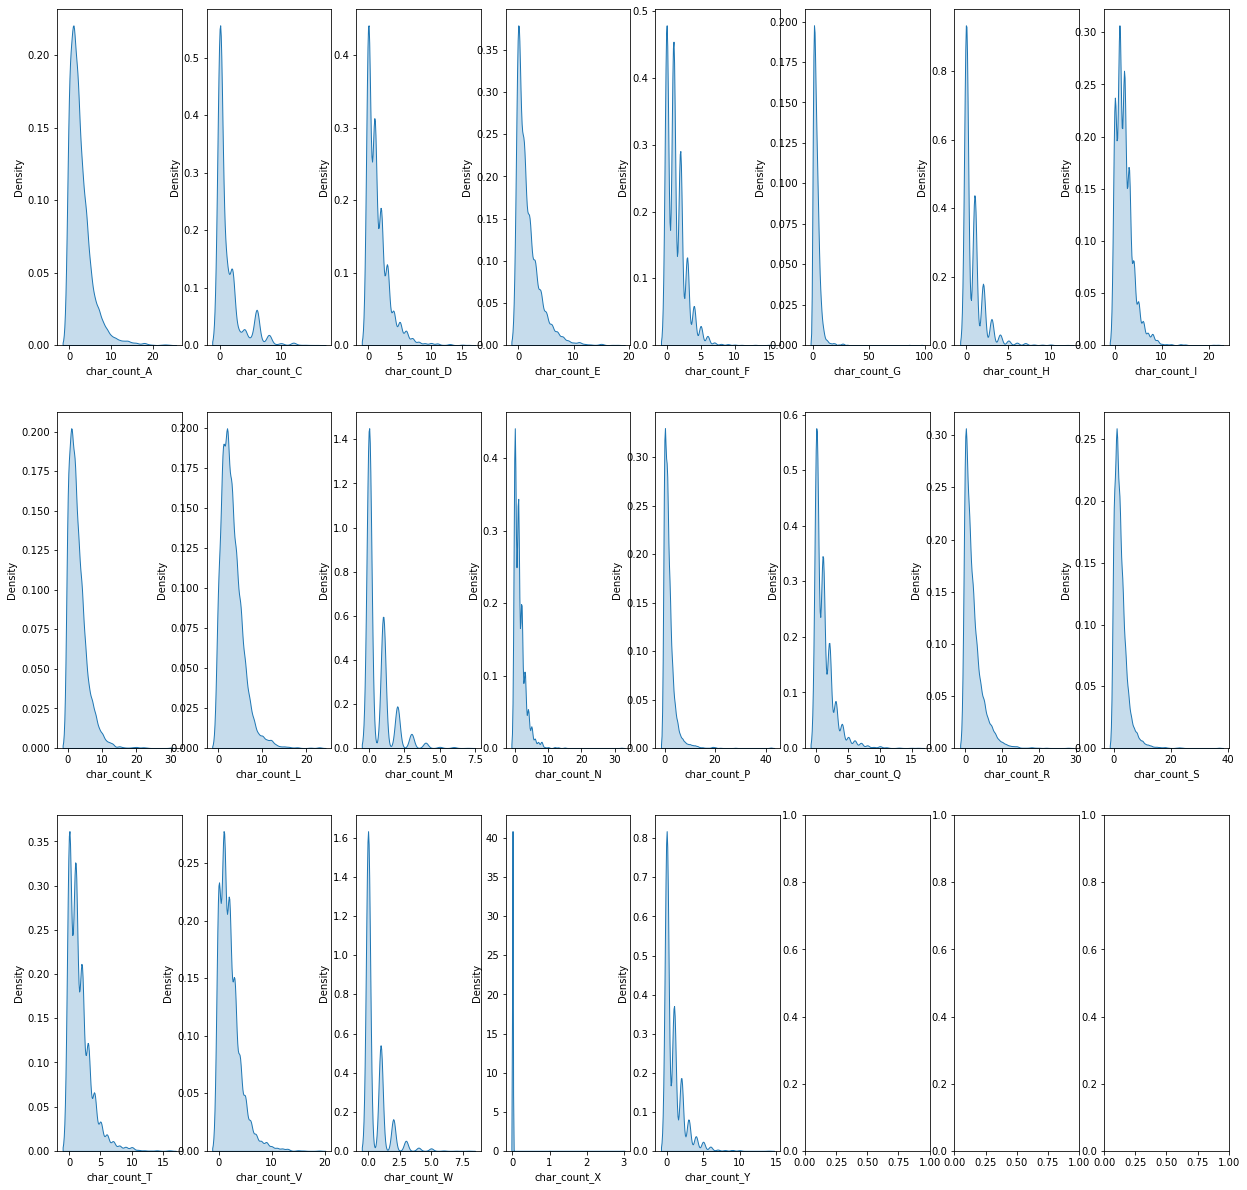

In [78]:
fig, axs = plt.subplots(3,8, figsize=(21, 21))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(all_amp_chars):
    sns.kdeplot(amp_df[f'char_count_{char}'], shade=True, ax=axs[i])

<AxesSubplot:xlabel='sequence_len', ylabel='label'>

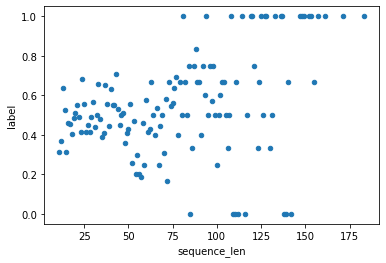

In [85]:
# Percent of AMP by sequence length
amp_df.groupby('sequence_len')[['label']].mean().reset_index().plot.scatter(x='sequence_len', y='label')

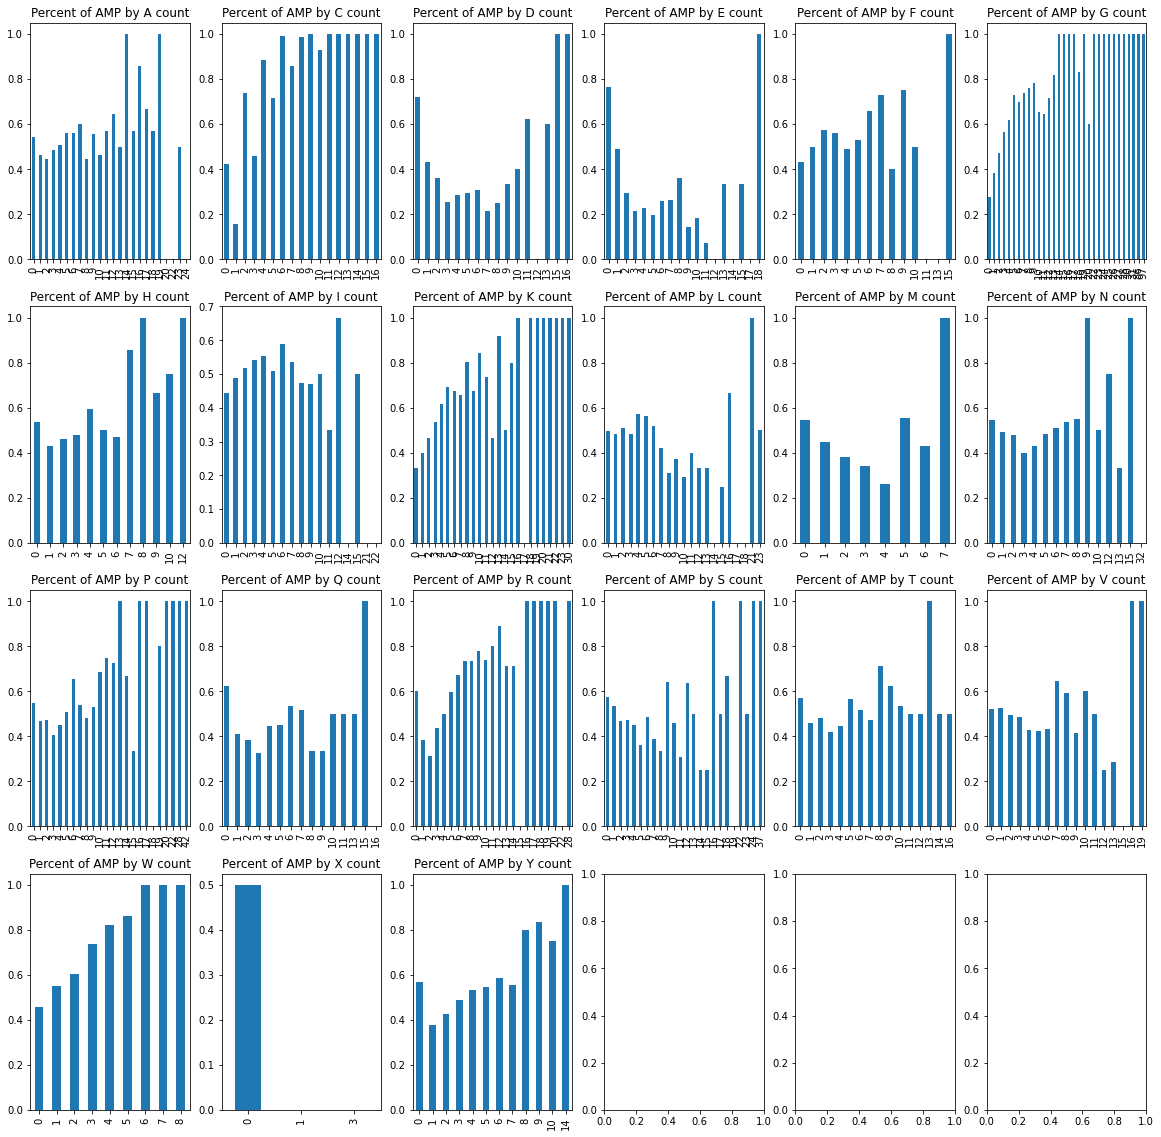

In [87]:
# Percent of AMP by sequence length
fig, axs = plt.subplots(4, 6, figsize=(20, 20))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(all_amp_chars):
    amp_df.groupby(f'char_count_{char}')['label'].mean().plot.bar(ax=axs[i], title=f'Percent of AMP by {char} count', xlabel='')

/tmp/ipykernel_12449/2066428898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(amp_df.corr(), annot=True)


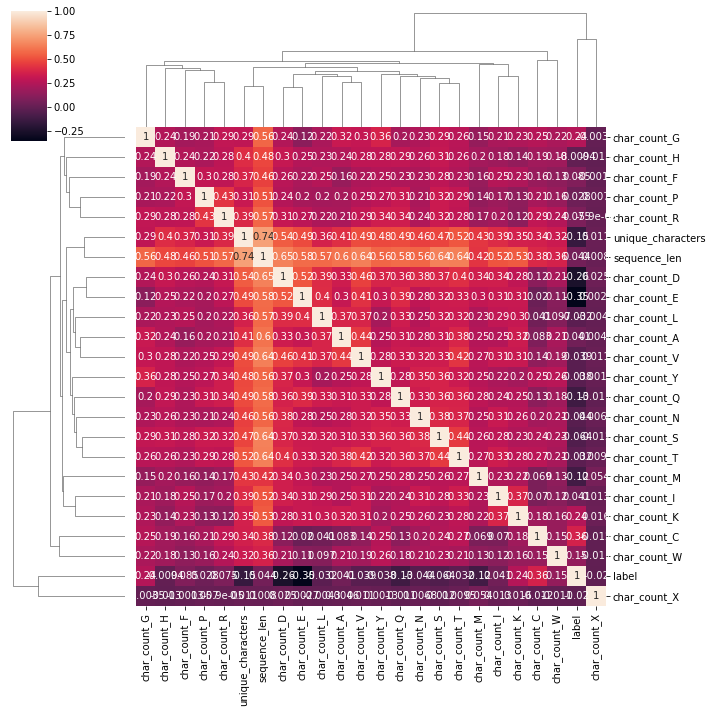

In [88]:
sns.clustermap(amp_df.corr(), annot=True)